In [14]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import platform

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager,rc
if platform.system() == 'Windows' :
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [15]:
df = pd.read_excel("./../9 - Data/Kmeans_12.xlsx")
#df = pd.read_excel("./../9 - Data/Kmeans_2.xlsx")

In [16]:
df.groupby("predict").count()

,브랜드,평판,성장성,본사의신용도,안정성,창업대비매출,개월수
predict,,,,,,,
0,224,224,224,224,224,224,224
1,134,134,134,134,134,134,134
2,90,90,90,90,90,90,90
3,165,165,165,165,165,165,165
4,45,45,45,45,45,45,45
5,120,120,120,120,120,120,120
6,140,140,140,140,140,140,140
7,91,91,91,91,91,91,91
8,170,170,170,170,170,170,170


In [17]:
df_mean = df.groupby("predict").mean()

In [18]:
df_mean['x'] = df_mean['평판']

In [19]:
df_values = df_mean.values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaler = scaler.fit_transform(df_values)

df_mean = pd.DataFrame(df_scaler, columns=df_mean.columns, index=df_mean.index)
df_mean

,평판,성장성,본사의신용도,안정성,창업대비매출,개월수,x
predict,,,,,,,
0,0.829647,0.140595,0.182441,0.920148,0.550758,0.142650,0.829647
1,0.555881,1.000000,0.000000,0.000000,0.363590,0.000000,0.555881
2,0.077811,0.014607,0.999843,0.769766,0.094631,0.193235,0.077811
3,0.035468,0.072185,0.008952,0.122715,0.141700,0.183705,0.035468
4,0.267916,0.151142,0.235836,1.000000,0.808337,1.000000,0.267916
5,0.413219,0.000000,0.091146,0.739125,0.075156,0.582526,0.413219
6,0.547879,0.984310,0.158891,0.818467,0.646438,0.007118,0.547879
7,0.945597,0.059533,0.999936,0.713960,0.287997,0.133160,0.945597
8,1.000000,0.036279,0.017138,0.127498,0.000000,0.175275,1.000000


In [20]:
# # for i in df_mean.index :
# #     for j in df_mean.index :
# #         temp = df_mean.iloc[i,:] - df_mean.iloc[j,:]
# #         if np.sum(temp>0) == 7 :
# #             print('{0}은 {1}을 덮습니다.'.format(i,j))
# index_1 = df_mean.index
# index_2 = df_mean.index

# k = []
# for i in index_1 :
#     for j in index_2 :
#         temp2 = df_mean.iloc[i,:]+3/25 - df_mean.iloc[j,:]
#         if (np.sum(temp2>0) == 7) and (i != j) :
#             print('{0}은 {1}을 덮습니다.'.format(i,j))
#             k.append(j)
#             index_2 = index_2.drop(j)

In [21]:
labels = np.array(list(df_mean.columns[:-1]))
stats=df_mean.loc[:,:].values
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
angles=np.concatenate((angles,[angles[0]]))

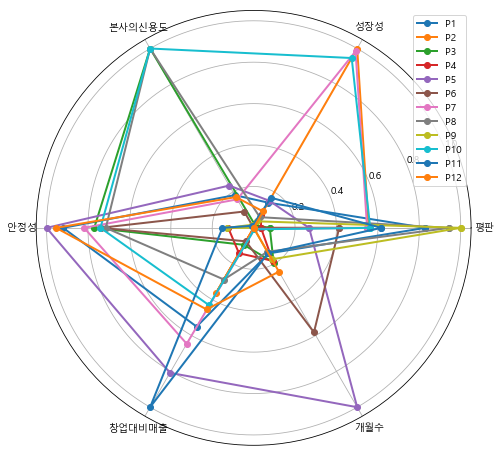

In [22]:
fig=plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,polar=True)
ax.set_thetagrids(angles * 180/np.pi, labels)

#for i in index_2:
for i in df_mean.index:
   ax.plot(angles, stats[i], 'o-', linewidth=2, label='P{0}'.format(i+1))
ax.legend(loc = 'best')   # 범주 위치 가장 최적으로 지정
# ax.fill(angles, stats, alpha=0.25)
ax.grid(True)

In [23]:
# def draw_starplot_1(stat,i,j):
#     fig = plt.figure(figsize=(20,20))
#     ax = fig.add_subplot(3,4,j+1, polar=True)
#     ax.set_thetagrids(angles * 180/np.pi, labels)
#     ax.plot(angles, stat, 'o-', linewidth=2,color='b', label='P{0}'.format(i+1))
#     ax.legend(loc = 'best')
#     ax.fill(angles, stat, color='g' ,alpha=0.7)
#     ax.grid(True)
#     ax.set_rlim([0,1])

In [24]:
# j=0
# for i in index_2:
#     draw_starplot_1(stats[i],i,j)
#     j+=1

In [25]:
def draw_starplot(stat,i):
    fig = plt.figure(figsize=(30,30))
    ax = fig.add_subplot(4,3,i+1, polar=True)
    ax.set_thetagrids(angles * 180/np.pi, labels)
    ax.plot(angles, stat, '-', linewidth=1.5, color='lightsteelblue', label='P{0}'.format(i+1))
    ax.legend(loc = 'best')
    ax.fill(angles, stat, color='lightsteelblue' ,alpha=0.7)
    ax.grid(True)
    ax.set_rlim([-0.1,1])
    plt.savefig('clust_%d'%(i+1))

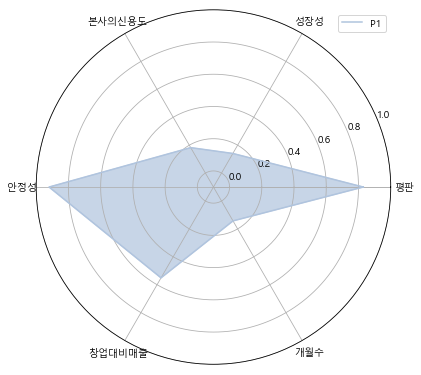

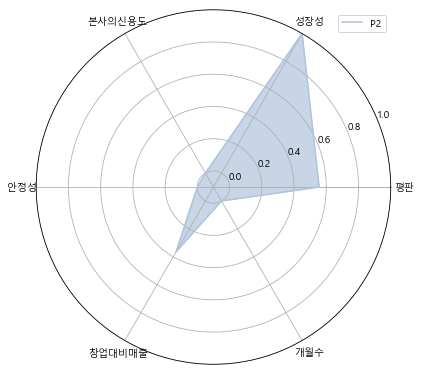

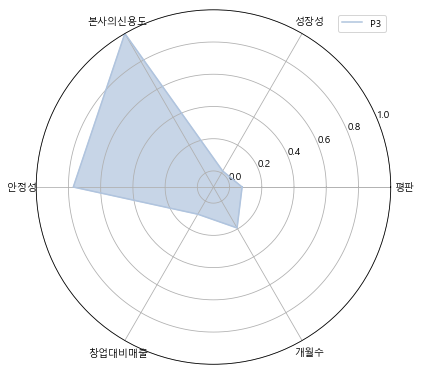

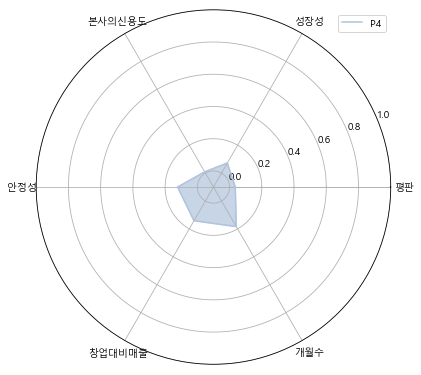

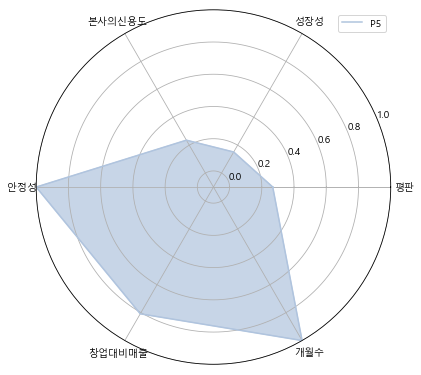

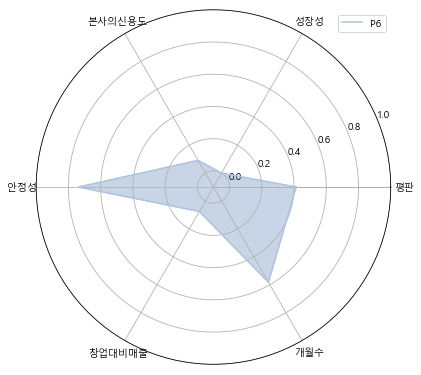

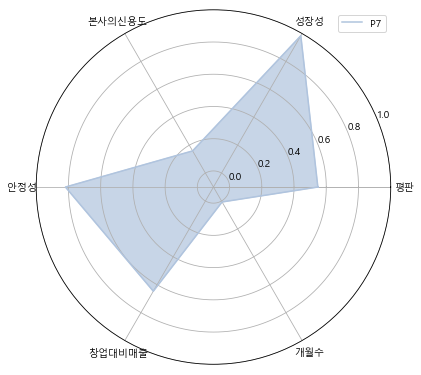

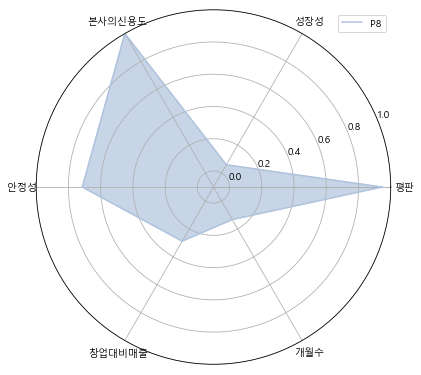

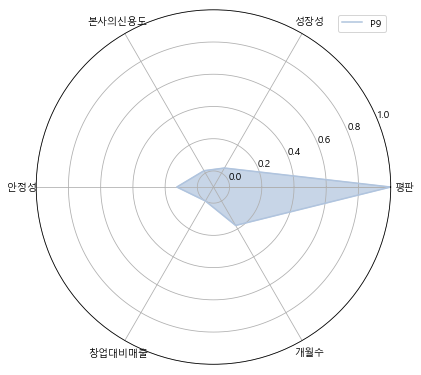

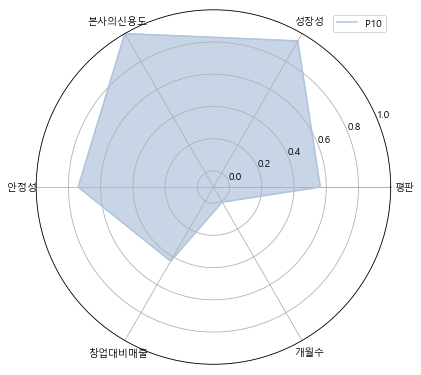

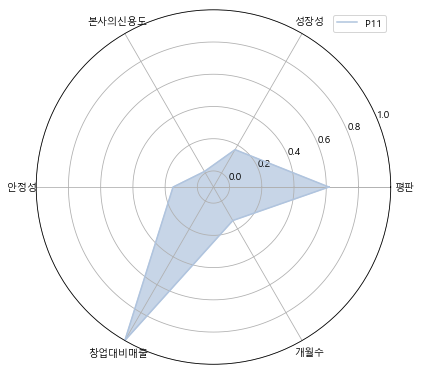

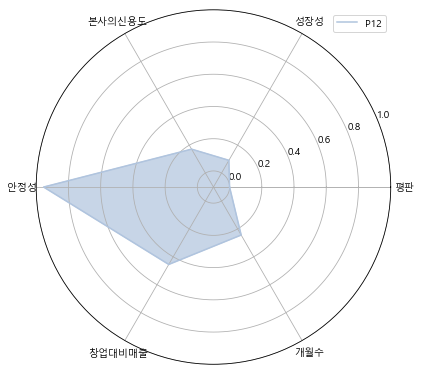

In [26]:
for i in df_mean.index:
    draw_starplot(stats[i],i)

In [131]:
# def draw_starplot(stat,i):
#     fig = plt.figure(figsize=(20,20))
#     ax = fig.add_subplot(3,4,i-11, polar=True)
#     ax.set_thetagrids(angles * 180/np.pi, labels)
#     ax.plot(angles, stat, 'o-', linewidth=2,color='b', label='P{0}'.format(i+1))
#     ax.legend(loc = 'best')
#     ax.fill(angles, stat, color='g' ,alpha=0.7)
#     ax.grid(True)
#     ax.set_rlim([0,1])
    
# for i in range(12,24):
#     draw_starplot(stats[i],i)

In [132]:
# fig = plt.figure(figsize=(20,20))
# ax = fig.add_subplot(3,4,1, polar=True)
# ax.set_thetagrids(angles * 180/np.pi, labels)
# ax.plot(angles, stats[24], 'o-', linewidth=2,color='b', label='P{0}'.format(25))
# ax.legend(loc = 'best')
# ax.fill(angles, stats[24], color='g' ,alpha=0.7)
# ax.grid(True)
# ax.set_rlim([0,1])